In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Liver.csv",sep=',',header=0)
df


,Cirrhosis,Diagnosis Age,Disease Free (Months),Disease Free Status,Mutation Count,Neoplasm Histologic Grade,Overall Survival Status,Overall Survival (Months),Tumor Other Histologic Subtype
0,4,44,86.9,DiseaseFree,62,I,Living,88.9,NBNC
1,3,59,38.1,Recurred,115,II,Living,88.9,NBNC
2,2,41,83.5,DiseaseFree,55,IIII,Living,88.1,HBV
3,2,44,10.3,Recurred,75,III,Deceased,58.2,NBNC
4,4,56,26.1,Recurred,44,IIII,Deceased,43.1,HCV
...,...,...,...,...,...,...,...,...,...
226,2,61,19.9,DiseaseFree,205,II,Living,20.5,HBV
227,3,61,16.7,DiseaseFree,1014,III,Living,20.3,HCV
228,4,62,5.6,Recurred,97,III,Living,20.2,HBV
229,4,51,18.4,DiseaseFree,52,III,Living,20.0,HBV


In [3]:
hp = {'Neoplasm Histologic Grade': {'I': 1, 'II': 2, 'III': 3, 'IIII': 4}}
df = df.replace(hp)

df


,Cirrhosis,Diagnosis Age,Disease Free (Months),Disease Free Status,Mutation Count,Neoplasm Histologic Grade,Overall Survival Status,Overall Survival (Months),Tumor Other Histologic Subtype
0,4,44,86.9,DiseaseFree,62,1,Living,88.9,NBNC
1,3,59,38.1,Recurred,115,2,Living,88.9,NBNC
2,2,41,83.5,DiseaseFree,55,4,Living,88.1,HBV
3,2,44,10.3,Recurred,75,3,Deceased,58.2,NBNC
4,4,56,26.1,Recurred,44,4,Deceased,43.1,HCV
...,...,...,...,...,...,...,...,...,...
226,2,61,19.9,DiseaseFree,205,2,Living,20.5,HBV
227,3,61,16.7,DiseaseFree,1014,3,Living,20.3,HCV
228,4,62,5.6,Recurred,97,3,Living,20.2,HBV
229,4,51,18.4,DiseaseFree,52,3,Living,20.0,HBV


In [4]:
df['Neoplasm Histologic Grade'] = pd.to_numeric(df['Neoplasm Histologic Grade'], errors='coerce')

df['Neoplasm Histologic Grade'] = df['Neoplasm Histologic Grade'].astype('Int64')

In [5]:
df.dtypes

Cirrhosis                           int64
Diagnosis Age                       int64
Disease Free (Months)             float64
Disease Free Status                object
Mutation Count                      int64
Neoplasm Histologic Grade           Int64
Overall Survival Status            object
Overall Survival (Months)         float64
Tumor Other Histologic Subtype     object
dtype: object

In [6]:
df.isna().sum()

Cirrhosis                          0
Diagnosis Age                      0
Disease Free (Months)              0
Disease Free Status                0
Mutation Count                     0
Neoplasm Histologic Grade         19
Overall Survival Status            0
Overall Survival (Months)          0
Tumor Other Histologic Subtype     0
dtype: int64

In [7]:
# Quitar los valores nulos
df = df.dropna()

# Mostrar las primeras 4 filas después de quitar los nulos
print("\nDataFrame después de quitar los nulos:")
print(df.head(4))




DataFrame después de quitar los nulos:
   Cirrhosis  Diagnosis Age  Disease Free (Months) Disease Free Status  \
0          4             44                   86.9         DiseaseFree   
1          3             59                   38.1            Recurred   
2          2             41                   83.5         DiseaseFree   
3          2             44                   10.3            Recurred   

   Mutation Count  Neoplasm Histologic Grade Overall Survival Status  \
0              62                          1                  Living   
1             115                          2                  Living   
2              55                          4                  Living   
3              75                          3                Deceased   

   Overall Survival (Months) Tumor Other Histologic Subtype  
0                       88.9                           NBNC  
1                       88.9                           NBNC  
2                       88.1              

In [8]:
df.isna().sum()

Cirrhosis                         0
Diagnosis Age                     0
Disease Free (Months)             0
Disease Free Status               0
Mutation Count                    0
Neoplasm Histologic Grade         0
Overall Survival Status           0
Overall Survival (Months)         0
Tumor Other Histologic Subtype    0
dtype: int64

In [9]:

features=['Cirrhosis','Diagnosis Age','Disease Free (Months)','Disease Free Status','Mutation Count','Neoplasm Histologic Grade','Overall Survival (Months)','Tumor Other Histologic Subtype']

label='Overall Survival Status'




In [10]:
from sklearn.svm import SVC #algoritmo maquina soporte vecotrial
from sklearn.preprocessing import LabelEncoder  #manipulacion de texto se convierta a numeros
from sklearn.model_selection import train_test_split   #genera de los datos de entrada, dos sets para,
# uno el proceso de entrenaiento
#y el otro para validar el proceso de entrenamiento

from sklearn.metrics import recall_score, accuracy_score, f1_score, confusion_matrix,classification_report
import seaborn as asns

In [11]:
le=LabelEncoder()
sobrevive=le
y=sobrevive.fit_transform(df[label])
df['Disease Free Status']=le.fit_transform(df['Disease Free Status'])
df['Neoplasm Histologic Grade']=le.fit_transform(df['Neoplasm Histologic Grade'])
df['Tumor Other Histologic Subtype']=le.fit_transform(df['Tumor Other Histologic Subtype'])

y

/tmp/ipykernel_12168/1404908208.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Disease Free Status']=le.fit_transform(df['Disease Free Status'])
/tmp/ipykernel_12168/1404908208.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Neoplasm Histologic Grade']=le.fit_transform(df['Neoplasm Histologic Grade'])
/tmp/ipykernel_12168/1404908208.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
df

,Cirrhosis,Diagnosis Age,Disease Free (Months),Disease Free Status,Mutation Count,Neoplasm Histologic Grade,Overall Survival Status,Overall Survival (Months),Tumor Other Histologic Subtype
0,4,44,86.9,0,62,0,Living,88.9,2
1,3,59,38.1,1,115,1,Living,88.9,2
2,2,41,83.5,0,55,3,Living,88.1,0
3,2,44,10.3,1,75,2,Deceased,58.2,2
4,4,56,26.1,1,44,3,Deceased,43.1,1
...,...,...,...,...,...,...,...,...,...
226,2,61,19.9,0,205,1,Living,20.5,0
227,3,61,16.7,0,1014,2,Living,20.3,1
228,4,62,5.6,1,97,2,Living,20.2,0
229,4,51,18.4,0,52,2,Living,20.0,0


In [13]:
xtrain, xtest,ytrain, ytest = train_test_split(df[features],y,test_size=0.20, random_state=0)

In [14]:
print('xtrain.shape' )
print(xtrain.shape)

print('len(ytrain)')
print(len(ytrain))

print('xtest.shape ')
print(xtest.shape)

print('len(ytest)')
print(len(ytest))


xtrain.shape
(169, 8)
len(ytrain)
169
xtest.shape 
(43, 8)
len(ytest)
43


In [15]:
df['Overall Survival Status'].value_counts()

Overall Survival Status
Living      176
Deceased     36
Name: count, dtype: int64

In [16]:
svm = SVC (probability=True)
modelo = svm.fit(xtrain,ytrain)
prediccion = modelo.predict(xtest)

In [17]:
# prediccion ~ ytest
prediccion_lista=prediccion.tolist()
ytest_lista = ytest.tolist()

i = 0

for pred in prediccion_lista:
  print(f"{pred} -> {ytest[i]}")
  i+=1

1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 0
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 0
1 -> 1
1 -> 0
1 -> 0
1 -> 1
1 -> 1
1 -> 0
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 0
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 1
1 -> 0
1 -> 1
1 -> 1
1 -> 1
1 -> 1


In [18]:
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ', recall_score(prediccion,ytest, average='micro'))

print('f1_score: ', f1_score(prediccion,ytest,  average='micro'))

print('classification_report=', classification_report(prediccion, ytest))

score:  0.8372093023255814
recall_score:  0.8372093023255814
f1_score:  0.8372093023255814
classification_report=               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.84      0.91        43

    accuracy                           0.84        43
   macro avg       0.50      0.42      0.46        43
weighted avg       1.00      0.84      0.91        43



/home/xexeyt/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/xexeyt/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/xexeyt/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
data = {'Cirrhosis': 2, 'Diagnosis Age': 61, 'Disease Free (Months)': 10.3, 'Disease Free Status': 0, 'Mutation Count': 44, 'Neoplasm Histologic Grade':1,'Overall Survival (Months)':43.1,'Tumor Other Histologic Subtype':2}

pp =pd.DataFrame(data, index=[0])
pre_pp= modelo.predict(pp)
print(pp)
sobrevive.inverse_transform(pre_pp.tolist())[0]

   Cirrhosis  Diagnosis Age  Disease Free (Months)  Disease Free Status  \
0          2             61                   10.3                    0   

   Mutation Count  Neoplasm Histologic Grade  Overall Survival (Months)  \
0              44                          1                       43.1   

   Tumor Other Histologic Subtype  
0                               2  


'HCV'

In [20]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import pydotplus
from IPython.display import Image

from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz


In [21]:
#DecisionTreeClassifier
svm = DecisionTreeClassifier (max_depth=5)
modelo = svm.fit(xtrain,ytrain)
prediccion = modelo.predict(xtest)

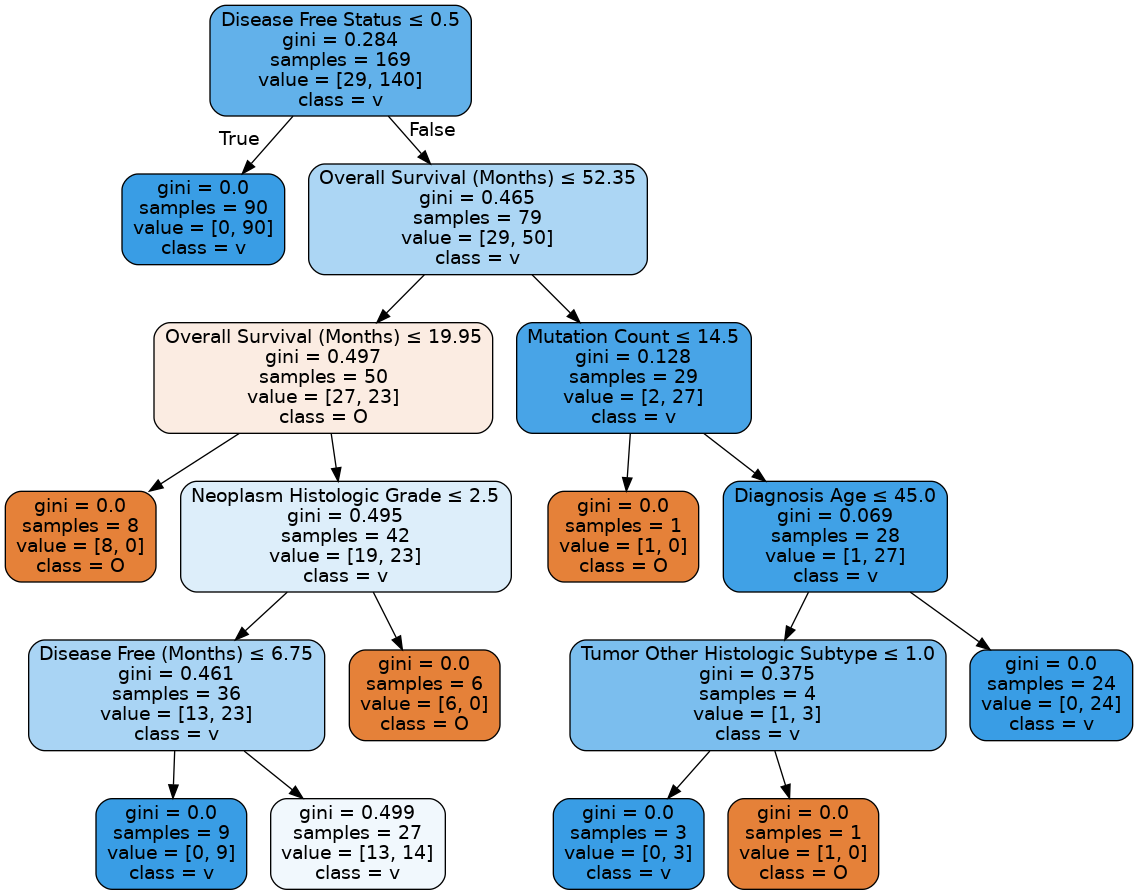

In [22]:
dot_data = export_graphviz(modelo, out_file=None,
                           feature_names=features,
                           class_names= label,
                           filled=True,rounded=True,
                           special_characters=True)


graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

#la imagen no se me genera por el tema de versiones

In [23]:
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ', recall_score(prediccion,ytest, average='micro'))

print('f1_score: ', f1_score(prediccion,ytest,  average='micro'))

print('classification_report=', classification_report(prediccion, ytest))

score:  0.8837209302325582
recall_score:  0.8837209302325582
f1_score:  0.8837209302325582
classification_report=               precision    recall  f1-score   support

           0       0.43      0.75      0.55         4
           1       0.97      0.90      0.93        39

    accuracy                           0.88        43
   macro avg       0.70      0.82      0.74        43
weighted avg       0.92      0.88      0.90        43



In [24]:
from sklearn.ensemble import GradientBoostingClassifier

In [34]:
#GradientBoostingClassifier
svm = GradientBoostingClassifier ()
modelo = svm.fit(xtrain,ytrain)
prediccion = modelo.predict(xtest)

dump(modelo, 'modelo.joblib')

['modelo.joblib']

In [26]:
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ', recall_score(prediccion,ytest, average='micro'))

print('f1_score: ', f1_score(prediccion,ytest,  average='micro'))

print('classification_report=', classification_report(prediccion, ytest))

score:  0.9069767441860465
recall_score:  0.9069767441860465
f1_score:  0.9069767441860465
classification_report=               precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.94      0.94      0.94        36

    accuracy                           0.91        43
   macro avg       0.83      0.83      0.83        43
weighted avg       0.91      0.91      0.91        43



In [27]:
import IPython
print(IPython.__version__)

import graphviz
print(graphviz.__version__)

7.34.0
0.20.1


In [30]:
from joblib import dump, load

In [31]:
df.head(3)

,Cirrhosis,Diagnosis Age,Disease Free (Months),Disease Free Status,Mutation Count,Neoplasm Histologic Grade,Overall Survival Status,Overall Survival (Months),Tumor Other Histologic Subtype
0,4,44,86.9,0,62,0,Living,88.9,2
1,3,59,38.1,1,115,1,Living,88.9,2
2,2,41,83.5,0,55,3,Living,88.1,0


In [32]:
le1 = LabelEncoder()
df['Disease Free Status_c'] = le1.fit_transform(df['Disease Free Status'])
dump(le1, 'le1.joblib')

le2 = LabelEncoder()
df['Overall Survival Status_c'] = le2.fit_transform(df['Overall Survival Status'])
dump(le2, 'le2.joblib')

le3 = LabelEncoder()
df['Tumor Other Histologic Subtype_c'] = le3.fit_transform(df['Tumor Other Histologic Subtype'])
dump(le3, 'le3.joblib')

le4 = LabelEncoder()
df['Neoplasm Histologic Grade_c'] = le4.fit_transform(df['Neoplasm Histologic Grade'])
dump(le4, 'le4.joblib')

/tmp/ipykernel_12168/3270831572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Disease Free Status_c'] = le1.fit_transform(df['Disease Free Status'])
/tmp/ipykernel_12168/3270831572.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Overall Survival Status_c'] = le2.fit_transform(df['Overall Survival Status'])
/tmp/ipykernel_12168/3270831572.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

['le4.joblib']